In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, accuracy_score, precision_score, confusion_matrix, recall_score, f1_score

In [40]:


df = pd.read_csv(r'D:\Stock-Price-Prediction-main\Stock-Price-Prediction-main\Data\SBIN.csv')

In [41]:
# Load the dataset
#df = pd.read_csv('/content/SBIN.NS.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,01-01-1996,18.691147,18.978922,18.540184,18.823240,12.409931,43733533.0
1,02-01-1996,18.894005,18.964767,17.738192,18.224106,12.014931,56167280.0
2,03-01-1996,18.327892,18.568489,17.643839,17.738192,11.694577,68296318.0
3,04-01-1996,17.502312,17.832542,17.223972,17.676863,11.654142,86073880.0
4,05-01-1996,17.738192,17.785366,17.459852,17.577793,11.588827,76613039.0


In [42]:
# Drop the 'Date' and 'Adj Close' columns
df.drop(['Date', 'Adj Close'], axis=1, inplace=True)

In [43]:
df.head()

,Open,High,Low,Close,Volume
0,18.691147,18.978922,18.540184,18.823240,43733533.0
1,18.894005,18.964767,17.738192,18.224106,56167280.0
2,18.327892,18.568489,17.643839,17.738192,68296318.0
3,17.502312,17.832542,17.223972,17.676863,86073880.0
4,17.738192,17.785366,17.459852,17.577793,76613039.0


In [44]:
# Handle missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [45]:
# Select features and target variable
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

In [46]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Scale the features using Min-Max scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
X_train.shape

(5659, 4)

In [49]:
X_test.shape

(1415, 4)

In [50]:
y_train.shape

(5659,)

In [51]:
y_test.shape

(1415,)

## 1. LINEAR REGRESSION

In [52]:
# Create a linear regression model
model1 = LinearRegression()

In [53]:
y_train.head()

5286    257.350006
3408    129.464996
5477    279.350006
6906    588.500000
530      21.644367
Name: Close, dtype: float64

In [54]:
# Train the model
model1.fit(X_train, y_train)

LinearRegression()

In [55]:
# Make predictions on the test set
pred1 = model1.predict(X_test)

In [56]:
# Calculate evaluation metrics
rmse1 = np.sqrt(mean_squared_error(y_test, pred1))
mae1 = mean_absolute_error(y_test, pred1)
mape1 = mean_absolute_percentage_error(y_test, pred1)
accuracy1 = accuracy_score(y_test > pred1, y_test > pred1.round())
precision1 = precision_score(y_test > pred1, y_test > pred1.round())
confusion1 = confusion_matrix(y_test > pred1, y_test > pred1.round())
recall1 = recall_score(y_test > pred1, y_test > pred1.round())
f11 = f1_score(y_test > pred1, y_test > pred1.round())

In [57]:
# Print the evaluation metrics
print("RMSE:", rmse1)
print("MAE:", mae1)
print("MAPE:", mape1)
print("Accuracy:", accuracy1)
print("Precision:", precision1)
print("Confusion Matrix:\n", confusion1)
print("Recall:", recall1)
print("F1 Score:", f11)

RMSE: 1.6881364643681729
MAE: 0.9433353485344458
MAPE: 0.006085435990852853
Accuracy: 0.8296819787985866
Precision: 0.8623595505617978
Confusion Matrix:
 [[560  98]
 [143 614]]
Recall: 0.8110964332892999
F1 Score: 0.8359428182437032


## 2. SVR

In [58]:
from sklearn.svm import SVR

In [59]:
# Create an SVR model
model2 = SVR()

In [60]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Scale the features using Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [61]:
# Train the model
model2.fit(X_train, y_train)

SVR()

In [62]:
# Make predictions on the test set
pred2 = model2.predict(X_test)


In [63]:
# Calculate evaluation metrics
rmse2 = np.sqrt(mean_squared_error(y_test, pred2))
mae2 = mean_absolute_error(y_test, pred2)
mape2 = mean_absolute_percentage_error(y_test, pred2)
accuracy2 = accuracy_score(y_test > pred2, y_test > pred2.round())
precision2 = precision_score(y_test > pred2, y_test > pred2.round())
confusion2 = confusion_matrix(y_test > pred2, y_test > pred2.round())
recall2 = recall_score(y_test > pred2, y_test > pred2.round())
f12 = f1_score(y_test > pred2, y_test > pred2.round())

In [64]:
# Print the evaluation metrics
print("RMSE:", rmse2)
print("MAE:", mae2)
print("MAPE:", mape2)
print("Accuracy:", accuracy2)
print("Precision:", precision2)
print("Confusion Matrix:\n", confusion2)
print("Recall:", recall2)
print("F1 Score:", f12)

RMSE: 147.71103599153602
MAE: 110.99419106508152
MAPE: 1.9715076513294716
Accuracy: 0.9992932862190813
Precision: 1.0
Confusion Matrix:
 [[727   0]
 [  1 687]]
Recall: 0.998546511627907
F1 Score: 0.9992727272727273


## 3. Random Forest

In [65]:
from sklearn.ensemble import RandomForestRegressor
# Create a Random Forest model
model3 = RandomForestRegressor()

In [66]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Scale the features using Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [67]:
# Train the model
model3.fit(X_train, y_train)

RandomForestRegressor()

In [68]:
# Make predictions on the test set
pred3 = model3.predict(X_test)

In [69]:
# Calculate evaluation metrics
rmse3 = np.sqrt(mean_squared_error(y_test, pred3))
mae3 = mean_absolute_error(y_test, pred3)
mape3 = mean_absolute_percentage_error(y_test, pred3)
accuracy3 = accuracy_score(y_test > pred3, y_test > pred3.round())
precision3 = precision_score(y_test > pred3, y_test > pred3.round())
confusion3 = confusion_matrix(y_test > pred3, y_test > pred3.round())
recall3 = recall_score(y_test > pred3, y_test > pred3.round())
f13 = f1_score(y_test > pred3, y_test > pred3.round())

In [70]:
# Print the evaluation metrics
print("RMSE:", rmse3)
print("MAE:", mae3)
print("MAPE:", mape3)
print("Accuracy:", accuracy3)
print("Precision:", precision3)
print("Confusion Matrix:\n", confusion3)
print("Recall:", recall3)
print("F1 Score:", f13)

RMSE: 2.195992399536305
MAE: 1.2557083374582683
MAPE: 0.007999870153129314
Accuracy: 0.8579505300353357
Precision: 0.8713450292397661
Confusion Matrix:
 [[618  88]
 [113 596]]
Recall: 0.840620592383639
F1 Score: 0.8557071069633884


## 4. Gradient Boosting Models (GBM)

In [71]:
import xgboost as xgb
# Create an XGBoost model
model4 = xgb.XGBRegressor()

In [72]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Scale the features using Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [73]:
# Train the model
model4.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [74]:
# Make predictions on the test set
pred4 = model4.predict(X_test)

In [75]:
# Calculate evaluation metrics
rmse4 = np.sqrt(mean_squared_error(y_test, pred4))
mae4 = mean_absolute_error(y_test, pred4)
mape4 = mean_absolute_percentage_error(y_test, pred4)
accuracy4 = accuracy_score(y_test > pred4, y_test > pred4.round())
precision4 = precision_score(y_test > pred4, y_test > pred4.round())
confusion4 = confusion_matrix(y_test > pred4, y_test > pred4.round())
recall4 = recall_score(y_test > pred4, y_test > pred4.round())
f14 = f1_score(y_test > pred4, y_test > pred4.round())

In [76]:
# Print the evaluation metrics
print("RMSE:", rmse4)
print("MAE:", mae4)
print("MAPE:", mape4)
print("Accuracy:", accuracy4)
print("Precision:", precision4)
print("Confusion Matrix:\n", confusion4)
print("Recall:", recall4)
print("F1 Score:", f14)

RMSE: 2.733930065274145
MAE: 1.502457380471909
MAPE: 0.010026410639661481
Accuracy: 0.8840989399293286
Precision: 0.8948106591865358
Confusion Matrix:
 [[613  75]
 [ 89 638]]
Recall: 0.8775790921595599
F1 Score: 0.8861111111111111


## 5. Extreme Gradient Boosting (XGBoost)

In [77]:
import xgboost as xgb
# Create an XGBoost model
model5 = xgb.XGBRegressor()

In [78]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Scale the features using Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [79]:
# Train the model
model5.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [80]:
# Make predictions on the test set
pred5 = model5.predict(X_test)

In [81]:
# Calculate evaluation metrics
rmse5 = np.sqrt(mean_squared_error(y_test, pred5))
mae5 = mean_absolute_error(y_test, pred5)
mape5 = mean_absolute_percentage_error(y_test, pred5)
accuracy5 = accuracy_score(y_test > pred5, y_test > pred5.round())
precision5 = precision_score(y_test > pred5, y_test > pred5.round())
confusion5 = confusion_matrix(y_test > pred5, y_test > pred5.round())
recall5 = recall_score(y_test > pred5, y_test > pred5.round())
f15 = f1_score(y_test > pred5, y_test > pred5.round())

In [82]:
# Print the evaluation metrics
print("RMSE:", rmse5)
print("MAE:", mae5)
print("MAPE:", mape5)
print("Accuracy:", accuracy5)
print("Precision:", precision5)
print("Confusion Matrix:\n", confusion5)
print("Recall:", recall5)
print("F1 Score:", f15)

RMSE: 2.733930065274145
MAE: 1.502457380471909
MAPE: 0.010026410639661481
Accuracy: 0.8840989399293286
Precision: 0.8948106591865358
Confusion Matrix:
 [[613  75]
 [ 89 638]]
Recall: 0.8775790921595599
F1 Score: 0.8861111111111111


## 6. AdaBoostRegressor

In [83]:
from sklearn.ensemble import AdaBoostRegressor
# Create an AdaBoost model
model6 = AdaBoostRegressor()

In [84]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Scale the features using Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [85]:
# Train the model
model6.fit(X_train, y_train)

AdaBoostRegressor()

In [86]:
# Make predictions on the test set
pred6 = model6.predict(X_test)

In [87]:
# Calculate evaluation metrics
rmse6 = np.sqrt(mean_squared_error(y_test, pred6))
mae6 = mean_absolute_error(y_test, pred6)
mape6 = mean_absolute_percentage_error(y_test, pred6)
accuracy6 = accuracy_score(y_test > pred6, y_test > pred6.round())
precision6 = precision_score(y_test > pred6, y_test > pred6.round())
confusion6 = confusion_matrix(y_test > pred6, y_test > pred6.round())
recall6 = recall_score(y_test > pred6, y_test > pred6.round())
f16 = f1_score(y_test > pred6, y_test > pred6.round())

In [88]:
# Print the evaluation metrics
print("RMSE:", rmse6)
print("MAE:", mae6)
print("MAPE:", mape6)
print("Accuracy:", accuracy6)
print("Precision:", precision6)
print("Confusion Matrix:\n", confusion6)
print("Recall:", recall6)
print("F1 Score:", f16)

RMSE: 9.723815427250972
MAE: 7.9359850217244166
MAPE: 0.19268250975544216
Accuracy: 0.9872791519434629
Precision: 0.9776536312849162
Confusion Matrix:
 [[872  12]
 [  6 525]]
Recall: 0.9887005649717514
F1 Score: 0.9831460674157303


## 7. Decision Tree

In [89]:
from sklearn.tree import DecisionTreeRegressor
# Create a Decision Tree model
model7 = DecisionTreeRegressor()

In [90]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Scale the features using Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [91]:
# Train the model
model7.fit(X_train, y_train)

DecisionTreeRegressor()

In [92]:
# Make predictions on the test set
pred7 = model7.predict(X_test)

In [93]:
# Calculate evaluation metrics
rmse7 = np.sqrt(mean_squared_error(y_test, pred7))
mae7 = mean_absolute_error(y_test, pred7)
mape7 = mean_absolute_percentage_error(y_test, pred7)
accuracy7 = accuracy_score(y_test > pred7, y_test > pred7.round())
precision7 = precision_score(y_test > pred7, y_test > pred7.round())
confusion7 = confusion_matrix(y_test > pred7, y_test > pred7.round())
recall7 = recall_score(y_test > pred7, y_test > pred7.round())
f17 = f1_score(y_test > pred7, y_test > pred7.round())


In [94]:
# Print the evaluation metrics
print("RMSE:", rmse7)
print("MAE:", mae7)
print("MAPE:", mape7)
print("Accuracy:", accuracy7)
print("Precision:", precision7)
print("Confusion Matrix:\n", confusion7)
print("Recall:", recall7)
print("F1 Score:", f17)

RMSE: 3.1027677478550717
MAE: 1.6448253990569153
MAPE: 0.010274213890537552
Accuracy: 0.8607773851590106
Precision: 0.8702185792349727
Confusion Matrix:
 [[581  95]
 [102 637]]
Recall: 0.8619756427604871
F1 Score: 0.8660774983004759


## 8. KNeighborsRegressor(KNN)

In [95]:
from sklearn.neighbors import KNeighborsRegressor
# Create a KNN model
model8 = KNeighborsRegressor()

In [96]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Scale the features using Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [97]:
# Train the model
model8.fit(X_train, y_train)

KNeighborsRegressor()

In [98]:
# Make predictions on the test set
pred8 = model8.predict(X_test)

In [99]:
# Calculate evaluation metrics
rmse8 = np.sqrt(mean_squared_error(y_test, pred8))
mae8 = mean_absolute_error(y_test, pred8)
mape8 = mean_absolute_percentage_error(y_test, pred8)
accuracy8 = accuracy_score(y_test > pred8, y_test > pred8.round())
precision8 = precision_score(y_test > pred8, y_test > pred8.round())
confusion8 = confusion_matrix(y_test > pred8, y_test > pred8.round())
recall8 = recall_score(y_test > pred8, y_test > pred8.round())
f18 = f1_score(y_test > pred8, y_test > pred8.round())

In [100]:
# Print the evaluation metrics
print("RMSE:", rmse8)
print("MAE:", mae8)
print("MAPE:", mape8)
print("Accuracy:", accuracy8)
print("Precision:", precision8)
print("Confusion Matrix:\n", confusion8)
print("Recall:", recall8)
print("F1 Score:", f18)

RMSE: 148.73183825029315
MAE: 109.35229571264969
MAPE: 1.75024316976612
Accuracy: 0.9908127208480565
Precision: 0.9887820512820513
Confusion Matrix:
 [[785   7]
 [  6 617]]
Recall: 0.9903691813804173
F1 Score: 0.9895749799518845


## 9. Artificial Neural Networks (ANN)

In [101]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [102]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Scale the features using Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [103]:
# Create an ANN model
model9 = Sequential()
model9.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model9.add(Dense(16, activation='relu'))
model9.add(Dense(1, activation='linear'))

c:\Users\U\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [104]:
# Compile the model
model9.compile(loss='mean_squared_error', optimizer='adam')

In [105]:
# Train the model
model9.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)

In [106]:
# Make predictions on the test set
pred9 = model9.predict(X_test_scaled).flatten()

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [107]:
# Calculate evaluation metrics
rmse9 = np.sqrt(mean_squared_error(y_test, pred9))
mae9 = mean_absolute_error(y_test, pred9)
mape9 = mean_absolute_percentage_error(y_test, pred9)
accuracy9 = accuracy_score(y_test > pred9, y_test > pred9.round())
precision9 = precision_score(y_test > pred9, y_test > pred9.round())
confusion9 = confusion_matrix(y_test > pred9, y_test > pred9.round())
recall9 = recall_score(y_test > pred9, y_test > pred9.round())
f19 = f1_score(y_test > pred9, y_test > pred9.round())


In [108]:
# Print the evaluation metrics
print("RMSE:", rmse9)
print("MAE:", mae9)
print("MAPE:", mape9)
print("Accuracy:", accuracy9)
print("Precision:", precision9)
print("Confusion Matrix:\n", confusion9)
print("Recall:", recall9)
print("F1 Score:", f19)

RMSE: 2.874360735348693
MAE: 1.7968192450302385
MAPE: 0.012787926302547417
Accuracy: 0.9236749116607774
Precision: 0.9596412556053812
Confusion Matrix:
 [[451  36]
 [ 72 856]]
Recall: 0.9224137931034483
F1 Score: 0.9406593406593406


## 10. LSTM(Long Short term Memory)

In [109]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [110]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Scale the features using Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [111]:
# Reshape the input data for LSTM
n_features = X_train_scaled.shape[1]
n_steps = 10
n_samples_train = X_train_scaled.shape[0] - n_steps + 1
n_samples_test = X_test_scaled.shape[0] - n_steps + 1

# Reshape the input data
X_train_reshaped = np.array([X_train_scaled[i:i+n_steps, :] for i in range(n_samples_train)])
X_test_reshaped = np.array([X_test_scaled[i:i+n_steps, :] for i in range(n_samples_test)])


In [112]:
# Create an LSTM model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))


c:\Users\U\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [113]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')


In [114]:
# Train the model
model.fit(X_train_reshaped, y_train[n_steps-1:], epochs=100, batch_size=32, verbose=0)

In [115]:
# Make predictions on the test set
y_pred = model.predict(X_test_reshaped).flatten()

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [116]:
# Calculate evaluation metrics
rmse10 = np.sqrt(mean_squared_error(y_test[n_steps-1:], y_pred))
mae10 = mean_absolute_error(y_test[n_steps-1:], y_pred)
mape10 = mean_absolute_percentage_error(y_test[n_steps-1:], y_pred)
accuracy10 = accuracy_score(y_test[n_steps-1:] > y_pred, y_test[n_steps-1:] > y_pred.round())
precision10 = precision_score(y_test[n_steps-1:] > y_pred, y_test[n_steps-1:] > y_pred.round())
recall10 = recall_score(y_test[n_steps-1:] > y_pred, y_test[n_steps-1:] > y_pred.round())
f110 = f1_score(y_test[n_steps-1:] > y_pred, y_test[n_steps-1:] > y_pred.round())
confusion10 = confusion_matrix(y_test[n_steps-1:] > y_pred, y_test[n_steps-1:] > y_pred.round())


In [117]:
# Print evaluation metrics
print("RMSE:", rmse10)
print("MAE:", mae10)
print("MAPE:", mape10)
print("Accuracy:", accuracy10)
print("Precision:", precision10)
print("Recall:", recall10)
print("F1 Score:", f110)
print("Confusion Matrix:\n", confusion10)

RMSE: 15.31708981303295
MAE: 11.690683141061895
MAPE: 0.09605738741227364
Accuracy: 0.9871977240398293
Precision: 0.9948096885813149
Recall: 0.9896729776247849
F1 Score: 0.9922346850733391
Confusion Matrix:
 [[ 238    6]
 [  12 1150]]


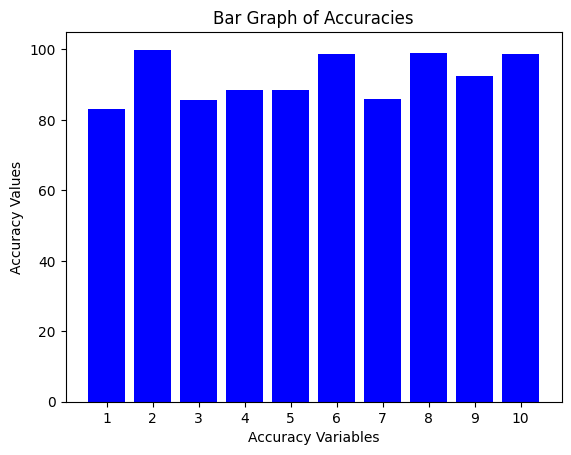

In [118]:
import matplotlib.pyplot as plt

# Assuming you have a list of accuracies from accuracy1 to accuracy10
accuracies = [accuracy1*100, accuracy2*100, accuracy3*100, accuracy4*100, accuracy5*100, accuracy6*100, accuracy7*100, accuracy8*100, accuracy9*100, accuracy10*100]

# List of corresponding labels for each accuracy
labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

# Plotting the bar graph
plt.bar(labels, accuracies, color='blue')
plt.xlabel('Accuracy Variables')
plt.ylabel('Accuracy Values')
plt.title('Bar Graph of Accuracies')
plt.show()


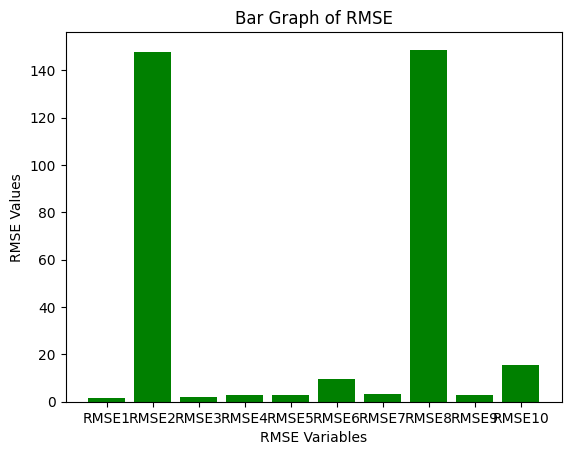

In [119]:
import matplotlib.pyplot as plt

# Assuming you have a list of RMSE values from rmse1 to rmse10
rmse_values = [rmse1, rmse2, rmse3, rmse4, rmse5, rmse6, rmse7, rmse8, rmse9, rmse10]

# List of corresponding labels for each RMSE value
labels = ['RMSE1', 'RMSE2', 'RMSE3', 'RMSE4', 'RMSE5', 'RMSE6', 'RMSE7', 'RMSE8', 'RMSE9', 'RMSE10']

# Plotting the bar graph
plt.bar(labels, rmse_values, color='green')
plt.xlabel('RMSE Variables')
plt.ylabel('RMSE Values')
plt.title('Bar Graph of RMSE')
plt.show()


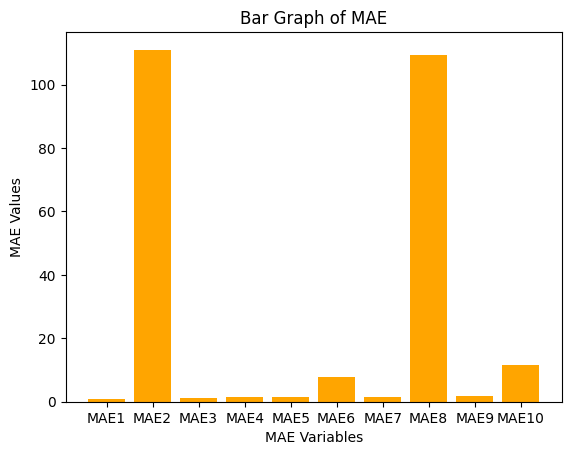

In [120]:
import matplotlib.pyplot as plt

# Assuming you have a list of MAE values from mae1 to mae10
mae_values = [mae1, mae2, mae3, mae4, mae5, mae6, mae7, mae8, mae9, mae10]

# List of corresponding labels for each MAE value
labels = ['MAE1', 'MAE2', 'MAE3', 'MAE4', 'MAE5', 'MAE6', 'MAE7', 'MAE8', 'MAE9', 'MAE10']

# Plotting the bar graph
plt.bar(labels, mae_values, color='orange')
plt.xlabel('MAE Variables')
plt.ylabel('MAE Values')
plt.title('Bar Graph of MAE')
plt.show()


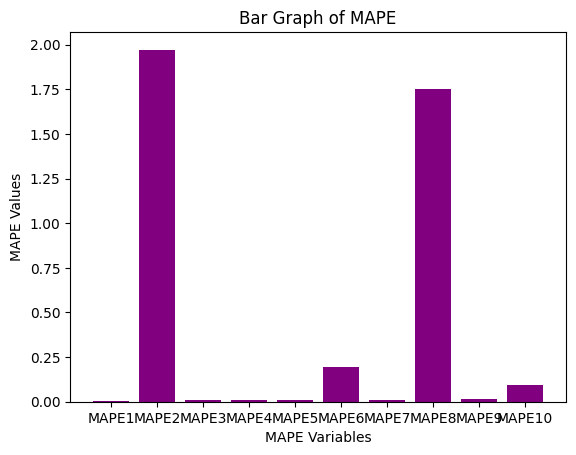

In [121]:
import matplotlib.pyplot as plt

# Assuming you have a list of MAPE values from mape1 to mape10
mape_values = [mape1, mape2, mape3, mape4, mape5, mape6, mape7, mape8, mape9, mape10]

# List of corresponding labels for each MAPE value
labels = ['MAPE1', 'MAPE2', 'MAPE3', 'MAPE4', 'MAPE5', 'MAPE6', 'MAPE7', 'MAPE8', 'MAPE9', 'MAPE10']

# Plotting the bar graph
plt.bar(labels, mape_values, color='purple')
plt.xlabel('MAPE Variables')
plt.ylabel('MAPE Values')
plt.title('Bar Graph of MAPE')
plt.show()


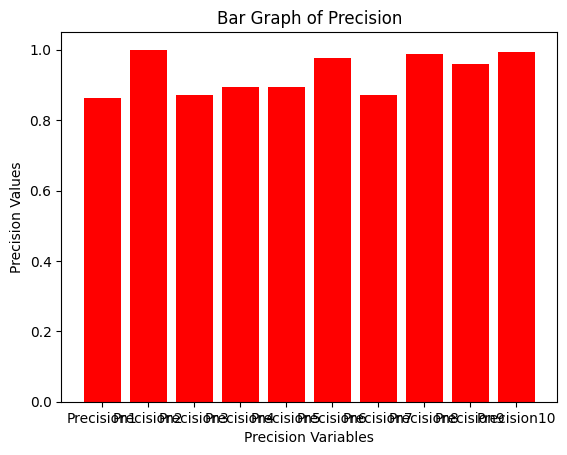

In [122]:
import matplotlib.pyplot as plt

# Assuming you have a list of precision values from precision1 to precision10
precision_values = [precision1, precision2, precision3, precision4, precision5, precision6, precision7, precision8, precision9, precision10]

# List of corresponding labels for each precision value
labels = ['Precision1', 'Precision2', 'Precision3', 'Precision4', 'Precision5', 'Precision6', 'Precision7', 'Precision8', 'Precision9', 'Precision10']

# Plotting the bar graph
plt.bar(labels, precision_values, color='red')
plt.xlabel('Precision Variables')
plt.ylabel('Precision Values')
plt.title('Bar Graph of Precision')
plt.show()


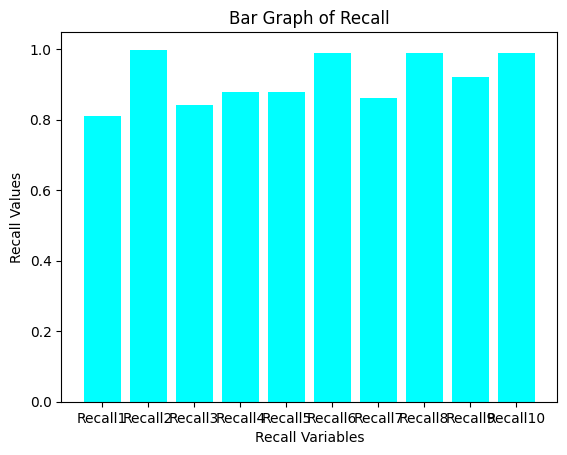

In [123]:
import matplotlib.pyplot as plt

# Assuming you have a list of recall values from recall1 to recall10
recall_values = [recall1, recall2, recall3, recall4, recall5, recall6, recall7, recall8, recall9, recall10]

# List of corresponding labels for each recall value
labels = ['Recall1', 'Recall2', 'Recall3', 'Recall4', 'Recall5', 'Recall6', 'Recall7', 'Recall8', 'Recall9', 'Recall10']

# Plotting the bar graph
plt.bar(labels, recall_values, color='cyan')
plt.xlabel('Recall Variables')
plt.ylabel('Recall Values')
plt.title('Bar Graph of Recall')
plt.show()
